In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from simple import SimpleMatrixFactorization

In [3]:
R    = np.array([[1,3,3,4,5],
                 [1,2,4,3,5],
                 [5,3,2,5,1]])
mask = np.array([[1,1,1,1,1],
                 [1,1,1,1,0],
                 [1,1,1,1,1]])

In [4]:
model = SimpleMatrixFactorization(ratings_matrix=R, mask=mask, hidden_dim=2, batch_size=5)

In [5]:
def plot_R(rhats, r=None, title=''):
    _, n_users, n_items = rhats.shape
    f, axes = plt.subplots(n_users, n_items, sharex=True, sharey=True)
    for i in range(n_users):
        for j in range(n_items):
            if r is not None:
                axes[i][j].axvline(x=r[i,j], color='r')
            axes[i][j].hist(rhats[:,i,j])
    f.suptitle(title)
    plt.show()

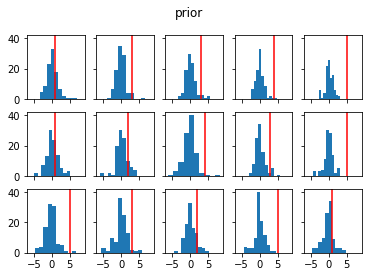

In [6]:
plot_R(model.rhat_samples(), R, title='prior')

1000/1000 [100%] ██████████████████████████████ Elapsed: 6s | Loss: 41.984


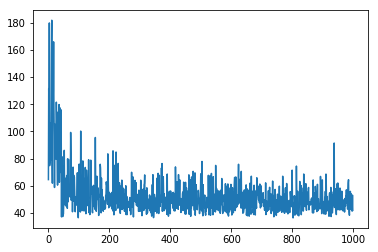

In [7]:
losses = model.train(verbose=True)
plt.plot(losses)

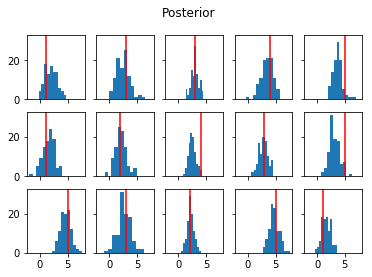

In [8]:
plot_R(model.rhat_samples(), R, title='Posterior')